# Pandas time series - example 2

## Stock market prices

### imports

In [1]:
%matplotlib inline
import pandas as pd  # 0.23.0
import warnings
warnings.filterwarnings('ignore')
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr  # pip install pandas_datareader==0.6.0
import fix_yahoo_finance as yf  # pip install fix_yahoo_finance==0.0.21
yf.pdr_override()

### Getting General Electric's stock price

In [2]:
gne = pdr.get_data_yahoo("GNE", start="2015-01-01", end="2018-01-01")
gne.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,6.32,6.32,6.10,6.18,5.455344,36800
2015-01-02,6.15,6.37,6.08,6.17,5.446517,17900
2015-01-05,6.22,6.24,5.94,5.98,5.278796,55100
2015-01-06,6.04,6.04,5.50,5.59,4.934527,81600
2015-01-07,5.69,5.72,5.33,5.64,4.978663,101100


For some reason, we also get the last day of 2014. Let us remove it from the dataframe (using pandas' partial string indexing feature):

In [3]:
gne = gne['2015':]
gne.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,6.15,6.37,6.08,6.17,5.446517,17900
2015-01-05,6.22,6.24,5.94,5.98,5.278796,55100
2015-01-06,6.04,6.04,5.50,5.59,4.934527,81600
2015-01-07,5.69,5.72,5.33,5.64,4.978663,101100
2015-01-08,5.74,5.79,5.64,5.71,5.040456,25000


In [4]:
gne.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,4.76,4.85,4.70,4.75,4.610673,63600
2017-12-26,4.75,4.77,4.59,4.61,4.474780,76700
2017-12-27,4.63,4.75,4.57,4.69,4.552433,67100
2017-12-28,4.69,4.90,4.66,4.73,4.591260,122600
2017-12-29,4.67,4.69,4.32,4.36,4.232113,117100


In [5]:
gne.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
Open         755 non-null float64
High         755 non-null float64
Low          755 non-null float64
Close        755 non-null float64
Adj Close    755 non-null float64
Volume       755 non-null int64
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


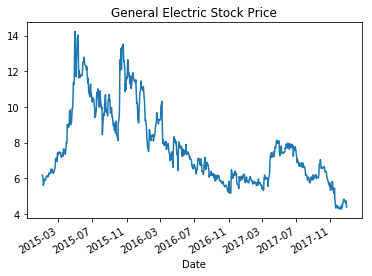

In [6]:
gne.Close.plot(title='General Electric Stock Price')

Stock price in 2016 (observe that it didn't go so well for GNE stock holders that year):

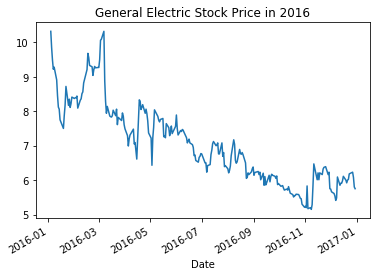

In [7]:
gne['2016'].Close.plot(title='General Electric Stock Price in 2016')

### Moving data between past and future with shift

In [8]:
gne['shifted'] = gne.Close.shift()  # default = 1 day

In [9]:
gne['lagged'] = gne.Close.shift(periods=-1)  # -1 day

In [10]:
gne[['Close', 'lagged', 'shifted']].tail(3)

,Close,lagged,shifted
Date,,,
2017-12-27,4.69,4.73,4.61
2017-12-28,4.73,4.36,4.69
2017-12-29,4.36,NaN,4.73


### Calculating the daily percent return

In [11]:
gne['change'] = gne.Close.div(gne.shifted)

In [12]:
gne[['Close', 'shifted', 'change']].head()

,Close,shifted,change
Date,,,
2015-01-02,6.17,NaN,NaN
2015-01-05,5.98,6.17,0.969206
2015-01-06,5.59,5.98,0.934783
2015-01-07,5.64,5.59,1.008945
2015-01-08,5.71,5.64,1.012411


In [13]:
gne['return'] = gne.change.sub(1).mul(100)
gne[['Close', 'shifted', 'change', 'return']].head()

,Close,shifted,change,return
Date,,,,
2015-01-02,6.17,NaN,NaN,NaN
2015-01-05,5.98,6.17,0.969206,-3.079417
2015-01-06,5.59,5.98,0.934783,-6.521739
2015-01-07,5.64,5.59,1.008945,0.894454
2015-01-08,5.71,5.64,1.012411,1.241135


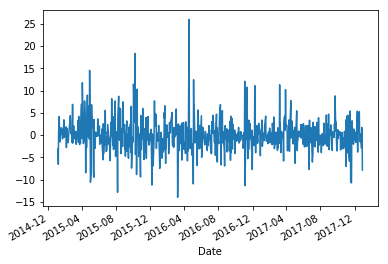

In [14]:
gne['return'].plot()

### Built-in time-series change methods: diff and pct_change

In [15]:
gne['diff'] = gne.Close.diff()  # one day difference

In [16]:
gne[['Close', 'diff']].head(5)

,Close,diff
Date,,
2015-01-02,6.17,NaN
2015-01-05,5.98,-0.19
2015-01-06,5.59,-0.39
2015-01-07,5.64,0.05
2015-01-08,5.71,0.07


In [17]:
gne['pct_change'] = gne.Close.pct_change().mul(100)

In [18]:
gne[['Close', 'return', 'pct_change']].head(3)

,Close,return,pct_change
Date,,,
2015-01-02,6.17,NaN,NaN
2015-01-05,5.98,-3.079417,-3.079417
2015-01-06,5.59,-6.521739,-6.521739


In [19]:
gne['return_30d'] = gne.Close.pct_change(30).mul(100)  # 30-days return

In [20]:
gne[['Close', 'return_30d']].tail()

,Close,return_30d
Date,,
2017-12-22,4.75,-16.958042
2017-12-26,4.61,-15.722121
2017-12-27,4.69,-8.932039
2017-12-28,4.73,-12.891344
2017-12-29,4.36,-19.109462


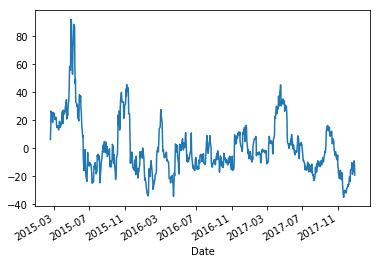

In [21]:
gne.return_30d.plot()

In [22]:
gne.Close.pct_change(1).mul(100).head()  # 1-day percent change

Date
2015-01-02         NaN
2015-01-05   -3.079417
2015-01-06   -6.521739
2015-01-07    0.894454
2015-01-08    1.241135
Name: Close, dtype: float64

### Normalizing series

In [23]:
VRX = pdr.get_data_yahoo("VRX", start="2015-01-01", end="2018-01-01")[['Close']]
VRX.rename(columns={'Close': 'VRX'}, inplace=True)
FSLR = pdr.get_data_yahoo("FSLR", start="2015-01-01", end="2018-01-01")[['Close']]
FSLR.rename(columns={'Close': 'FSLR'}, inplace=True)
TRIP = pdr.get_data_yahoo("TRIP", start="2015-01-01", end="2018-01-01")[['Close']]
TRIP.rename(columns={'Close': 'TRIP'}, inplace=True)
NVDA = pdr.get_data_yahoo("NVDA", start="2015-01-01", end="2018-01-01")[['Close']]
NVDA.rename(columns={'Close': 'NVDA'}, inplace=True)
GSPC = pdr.get_data_yahoo("^GSPC", start="2015-01-01", end="2018-01-01")[['Close']]
GSPC.rename(columns={'Close': 'GSPC'}, inplace=True)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [24]:
stock_prices = pd.concat([VRX, FSLR, TRIP, NVDA, GSPC], axis=1)
stock_prices = stock_prices['2016']
stock_prices.head()

,VRX,FSLR,TRIP,NVDA,GSPC
Date,,,,,
2016-01-04,98.500000,66.720001,82.980003,32.369999,2012.660034
2016-01-05,100.860001,72.029999,81.930000,32.889999,2016.709961
2016-01-06,102.400002,69.519997,80.099998,31.530001,1990.260010
2016-01-07,97.389999,66.220001,77.690002,30.280001,1943.089966
2016-01-08,91.059998,65.620003,76.180000,29.629999,1922.030029


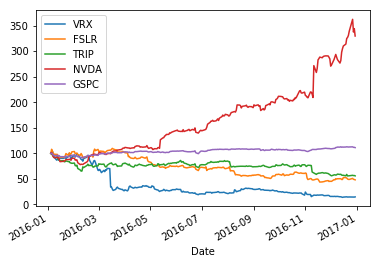

In [25]:
stock_prices.div(stock_prices.iloc[0]).mul(100).plot()

### Performance Difference against S&P 500 (^GSPC)

In [26]:
normalized = stock_prices.div(stock_prices.iloc[0]).mul(100)

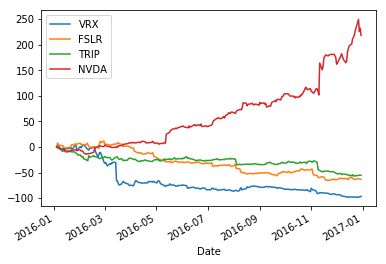

In [27]:
normalized[['VRX', 'FSLR', 'TRIP', 'NVDA']].sub(normalized['GSPC'], axis=0).plot()

### Downsampling & upsampling

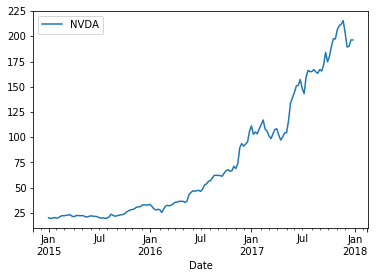

In [28]:
NVDA_w = NVDA.resample('W').mean()
NVDA_w.plot()

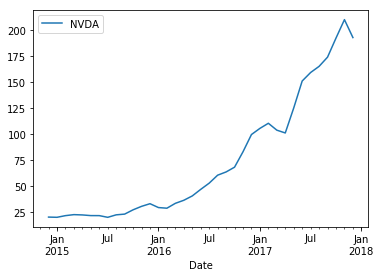

In [29]:
NVDA_m = NVDA.resample('M').mean()
NVDA_m.plot()

In [30]:
NVDA_md = NVDA_m.reindex(NVDA.index).interpolate(method='time')

In [31]:
NVDA_md.head()

,NVDA
Date,
2014-12-31,20.049999
2015-01-02,20.102585
2015-01-05,20.181464
2015-01-06,20.207757
2015-01-07,20.234050


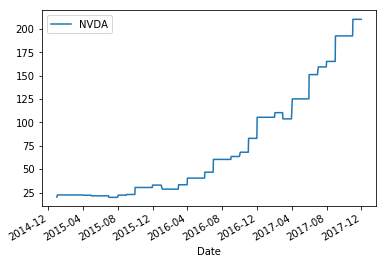

In [32]:
NVDA_m.reindex(NVDA.index).bfill().plot()

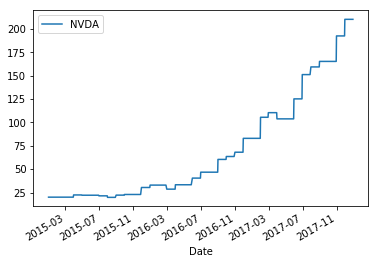

In [33]:
NVDA_m.reindex(NVDA.index).ffill().plot()